In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [ ]:
data = np.load('../../../../../../../Volumes/T7 Shield/exp_1_interpolated_numpy/1958_1_features.npy')
data[0,0]

targets = np.load('../../../../../../../Volumes/T7 Shield/exp_1_interpolated_numpy/1958_1_targets.npy')


array([ 6.81430193e-02,  8.00814296e-01,  0.00000000e+00,  7.68002886e-03,
        8.49698564e-01,  7.50583932e-19,  5.47797608e-01,  3.92963522e-01,
        4.80664293e-01,  5.89063058e-01,  1.00000000e+00,  1.00000000e+00,
       -1.69491525e-02, -7.44943237e+01, -1.79500000e+02])

In [ ]:
# Select first feature layer across the grid
feature_layer = targets[:, :, 1]

# Compute basic statistics
mean_value = np.mean(feature_layer)
std_value = np.std(feature_layer)
min_value = np.min(feature_layer)
max_value = np.max(feature_layer)

print("Feature layer statistics:")
print(f"Mean: {mean_value}")
print(f"Standard deviation: {std_value}")
print(f"Min value: {np.min(feature_layer)}")
print(f"Max value: {np.max(feature_layer)}")

Feature layer statistics:
Mean: 0.35602883049611156
Standard deviation: 0.31323556564218175
Min value: 0.0014214093480069134
Max value: 0.9158430822743612


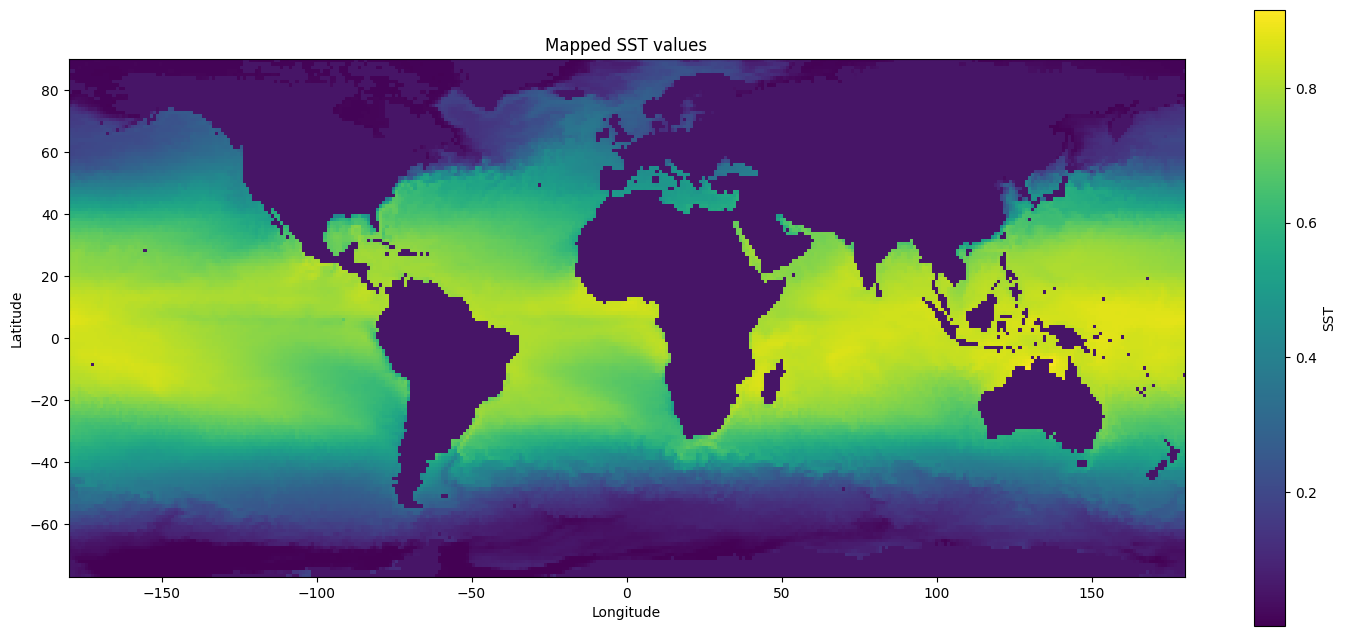

In [20]:
plt.figure(figsize=(18, 8))
# plt.imshow(grid_data, vmin=0, vmax=0.6, extent=(-180, 180, -77, 90), origin='lower')
plt.imshow(data[:,:,0], extent=(-180, 180, -77, 90), origin='lower')
plt.colorbar(label='SST')
plt.title('Mapped SST values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

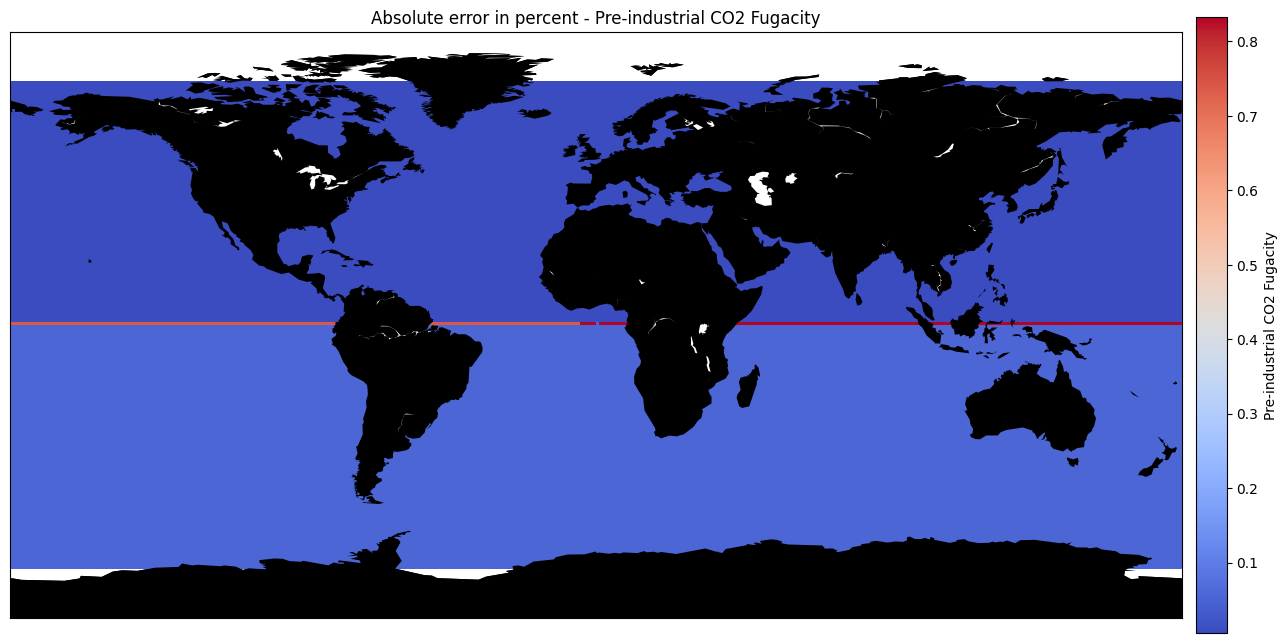

In [8]:
 # Define map boundaries
lat_min, lat_max = -74.5, 74.5
lon_min, lon_max = -180, 180

# Create a grid
num_lat, num_lon = 150, 360  # Grid resolution
lat_grid = np.linspace(lat_min, lat_max, num_lat)
lon_grid = np.linspace(lon_min, lon_max, num_lon)
lon_grid, lat_grid = np.meshgrid(lon_grid, lat_grid)

# Initialize Basemap
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180,
            resolution='c')

plt.figure(figsize=(18, 8))
m.fillcontinents(color='black')

# Plot data on the map
x, y = m(lon_grid, lat_grid)
pcm = m.pcolormesh(x, y, data[:,:,0], cmap='coolwarm', shading='auto')
m.fillcontinents(color='black')

# Add colorbar
cbar = plt.colorbar(pcm, orientation='vertical', pad=0.01)
cbar.set_label('Pre-industrial CO2 Fugacity')

plt.title("Absolute error in percent - Pre-industrial CO2 Fugacity")
plt.show()